In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file = "./Cleaned_dataset.csv"
df = pd.read_csv(file)

df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_of_journey    452088 non-null  datetime64[ns]
 1   Journey_day        452088 non-null  object        
 2   Airline            452088 non-null  object        
 3   Flight_code        452088 non-null  object        
 4   Class              452088 non-null  object        
 5   Source             452088 non-null  object        
 6   Departure          452088 non-null  object        
 7   Total_stops        452088 non-null  object        
 8   Arrival            452088 non-null  object        
 9   Destination        452088 non-null  object        
 10  Duration_in_hours  452088 non-null  float64       
 11  Days_left          452088 non-null  int64         
 12  Fare               452088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), 

In [6]:
df = df.dropna()
df.drop_duplicates( keep=False, inplace=True)
df = df.reset_index(drop = True)
df.shape

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
print (dict(zip(le.classes_,range(len(le.classes_)))))
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Class'] = le.fit_transform(df['Class'])
print (dict(zip(le.classes_,range(len(le.classes_)))))
df['Arrival'] = le.fit_transform(df['Arrival'])
df['Departure'] = le.fit_transform(df['Departure'])
df['Journey_day'] = le.fit_transform(df['Journey_day'])
df['Flight_code'] = le.fit_transform(df['Flight_code'])
df['Total_stops'] = le.fit_transform(df['Total_stops'])

{'Air India': 0, 'AirAsia': 1, 'AkasaAir': 2, 'AllianceAir': 3, 'GO FIRST': 4, 'Indigo': 5, 'SpiceJet': 6, 'StarAir': 7, 'Vistara': 8}
{'Business': 0, 'Economy': 1, 'First': 2, 'Premium Economy': 3}


In [8]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [9]:
passengers_df = df.groupby(['Airline', 'Date_of_journey', 'Flight_code', 'Class']).agg(
    total_passengers=('Fare', 'size'),
    average_fare=('Fare', 'mean'),
    Source=('Source', 'first'),
    Destination=('Destination', 'first'),
    Journey_day=('Journey_day', 'first'),
    Days_left=('Days_left', 'mean'),
    Arrival=('Arrival', 'first'),
    Departure=('Departure', 'first'),
    Duration_in_hours=('Duration_in_hours', 'first'),
    Total_stops=('Total_stops', 'first')
).reset_index()

# Rename columns if necessary
passengers_df.rename(columns={'Fare': 'average_fare'}, inplace=True)

passengers_df

,Airline,Date_of_journey,Flight_code,Class,total_passengers,average_fare,Source,Destination,Journey_day,Days_left,Arrival,Departure,Duration_in_hours,Total_stops
0,0,2023-01-16,713,0,15,55872.866667,5,3,1,1.0,0,1,2.5000,2
1,0,2023-01-16,713,1,4,15195.750000,5,3,1,1.0,0,1,2.5000,2
2,0,2023-01-16,715,0,1,67366.000000,3,6,1,1.0,0,1,5.5833,0
3,0,2023-01-16,717,0,2,48093.500000,3,6,1,1.0,0,1,9.3333,0
4,0,2023-01-16,718,1,1,12286.000000,3,6,1,1.0,0,0,24.5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77500,8,2023-03-06,1402,1,13,9208.076923,3,6,1,50.0,0,1,2.2500,2
77501,8,2023-03-06,1402,3,9,10954.000000,3,6,1,50.0,0,1,2.2500,2
77502,8,2023-03-06,1403,0,19,55887.947368,6,3,1,50.0,2,2,2.1667,2
77503,8,2023-03-06,1403,1,14,10941.857143,6,3,1,50.0,2,2,2.1667,2


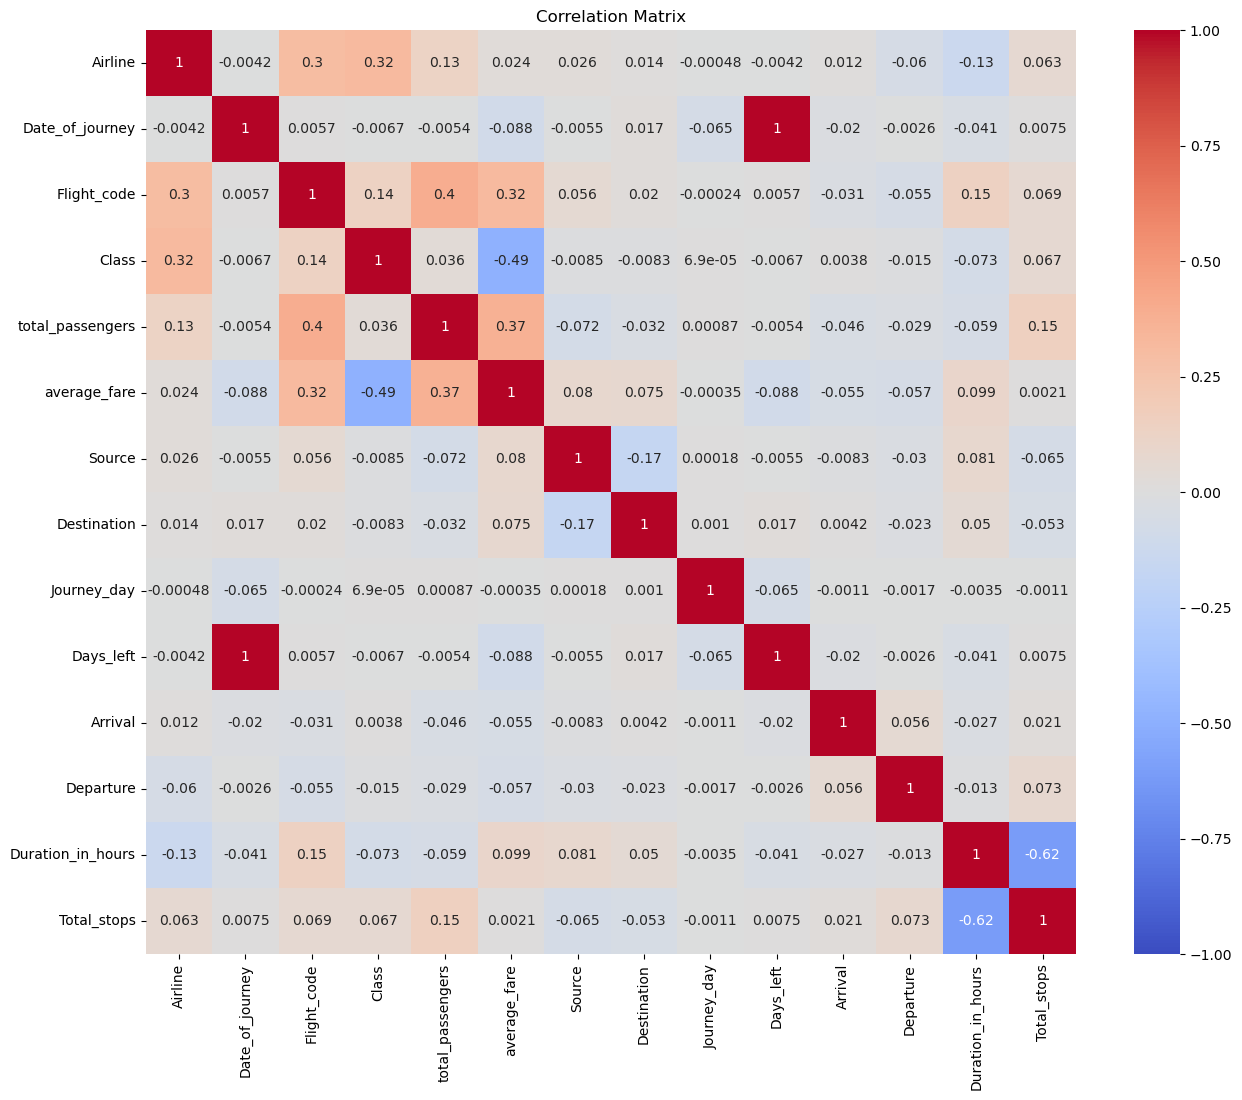

In [10]:
import seaborn as sns

df_corr = passengers_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
passengers_df.to_csv('passengers_2.csv', index=False)

In [12]:
from sklearn.model_selection import train_test_split

models_dict = {}

passengers_df.sort_values(by='Date_of_journey')

df['year'] = passengers_df['Date_of_journey'].dt.year
df['month'] = passengers_df['Date_of_journey'].dt.month
df['day'] = passengers_df['Date_of_journey'].dt.day


X=passengers_df.drop(['total_passengers','Date_of_journey'],axis=1)
y=passengers_df['total_passengers']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])
X['average_fare'] = minmax.fit_transform(X[['average_fare']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

,Airline,Flight_code,Class,average_fare,Source,Destination,Journey_day,Days_left,Arrival,Departure,Duration_in_hours,Total_stops
8456,0,715,0,0.468264,3,6,4,0.437733,0,1,-0.168746,0
15872,1,1078,1,0.082640,3,1,5,-0.187977,2,0,0.777310,1
32637,5,97,1,0.078716,3,6,3,-0.813688,0,0,-0.789097,2
25799,5,64,1,0.090130,3,4,5,-1.647968,1,2,-0.013645,0
63071,8,1300,0,0.494625,2,3,5,-0.674641,2,0,0.560179,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,765,1,0.060609,3,6,6,-0.118454,3,0,0.141438,0
54886,6,1177,1,0.208903,0,1,0,-0.466071,2,0,0.978919,0
76820,8,1305,0,0.519933,2,3,3,1.619630,1,1,-0.727067,2
860,0,779,1,0.062108,6,1,4,-1.508921,0,0,2.235141,0


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(criterion='squared_error', random_state=42)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [14]:
score = r2_score(y_preds, y_test)
print (score)

0.9175746399532104


In [15]:
def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

print (MAPE (y_test, y_preds))
RMSE (y_test, y_preds)
models_dict = {}
models_dict['DecisionTreeRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

12.81273736746868


In [16]:
out=pd.DataFrame({'Actual_booked':y_test,'Pred_booked':y_preds})
result=passengers_df.merge(out,left_index=True,right_index=True)

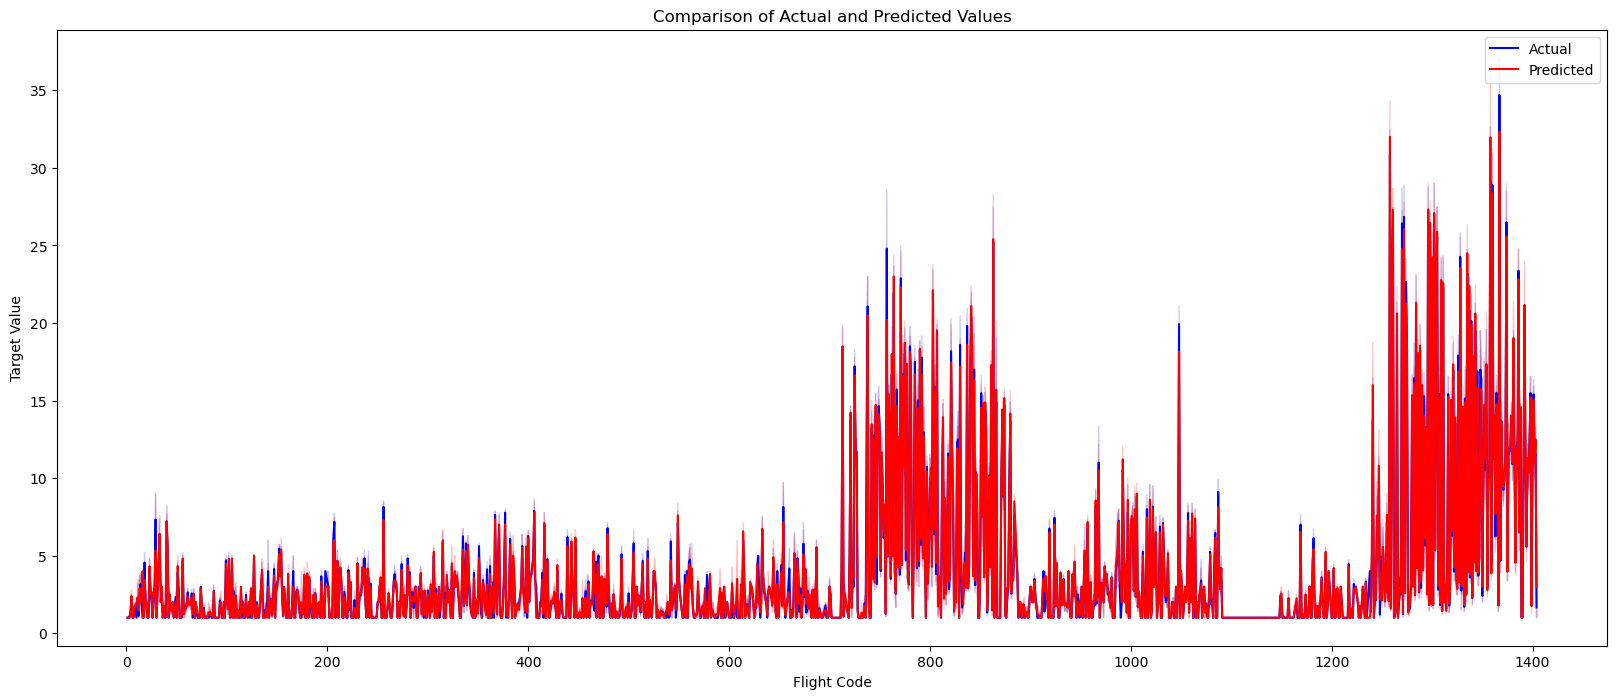

In [17]:
import seaborn as sns

plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


In [19]:
score = r2_score(y_preds, y_test)
print (score)
print(MAPE (y_test, y_preds))

models_dict['RandomForestRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9531076098522678
12.816158034353872


In [20]:
out=pd.DataFrame({'Actual_booked':y_test,'Pred_booked':y_preds})
result=passengers_df.merge(out,left_index=True,right_index=True)

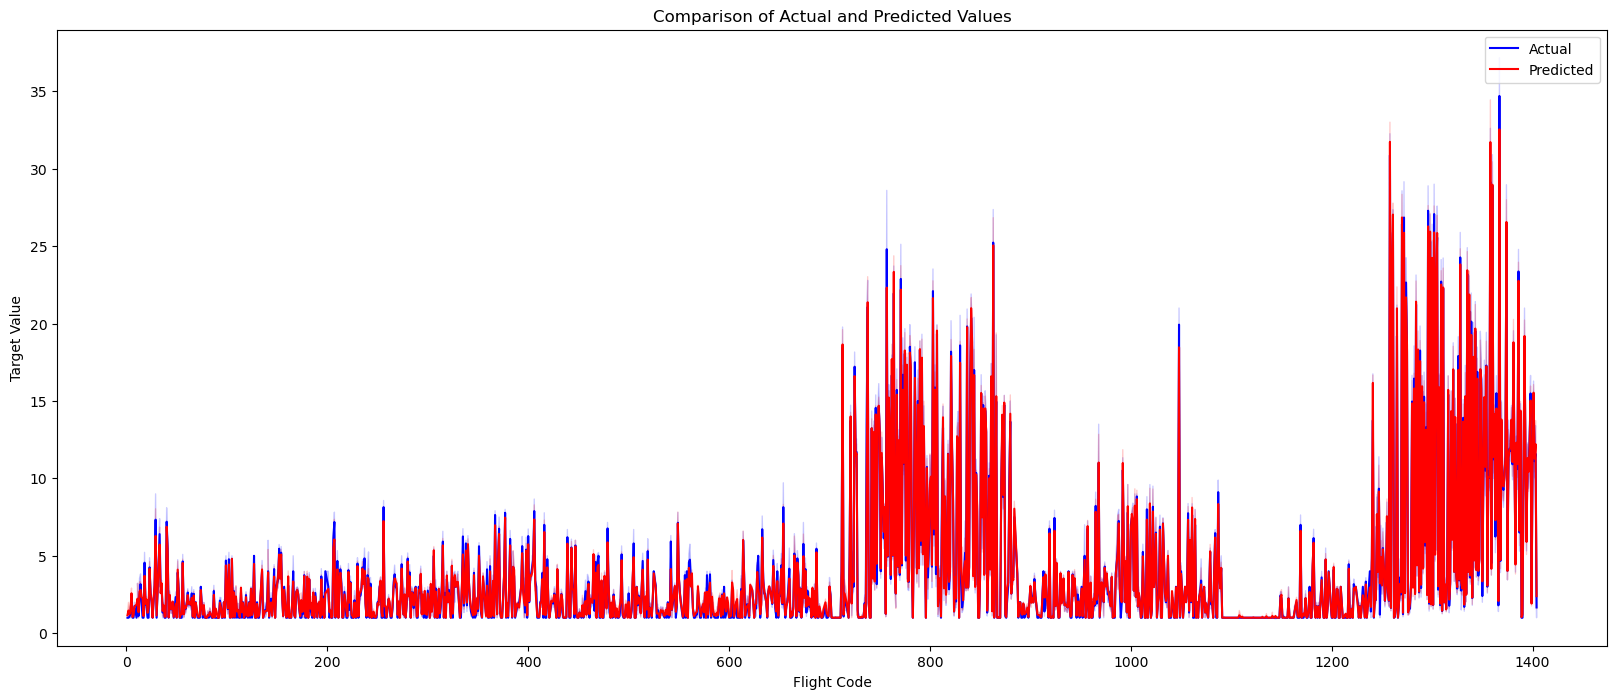

In [21]:
import seaborn as sns

plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [22]:
airline_df = result[result['Airline']==0]
airline_df = airline_df[airline_df['Class']==1]

<Figure size 2000x800 with 0 Axes>

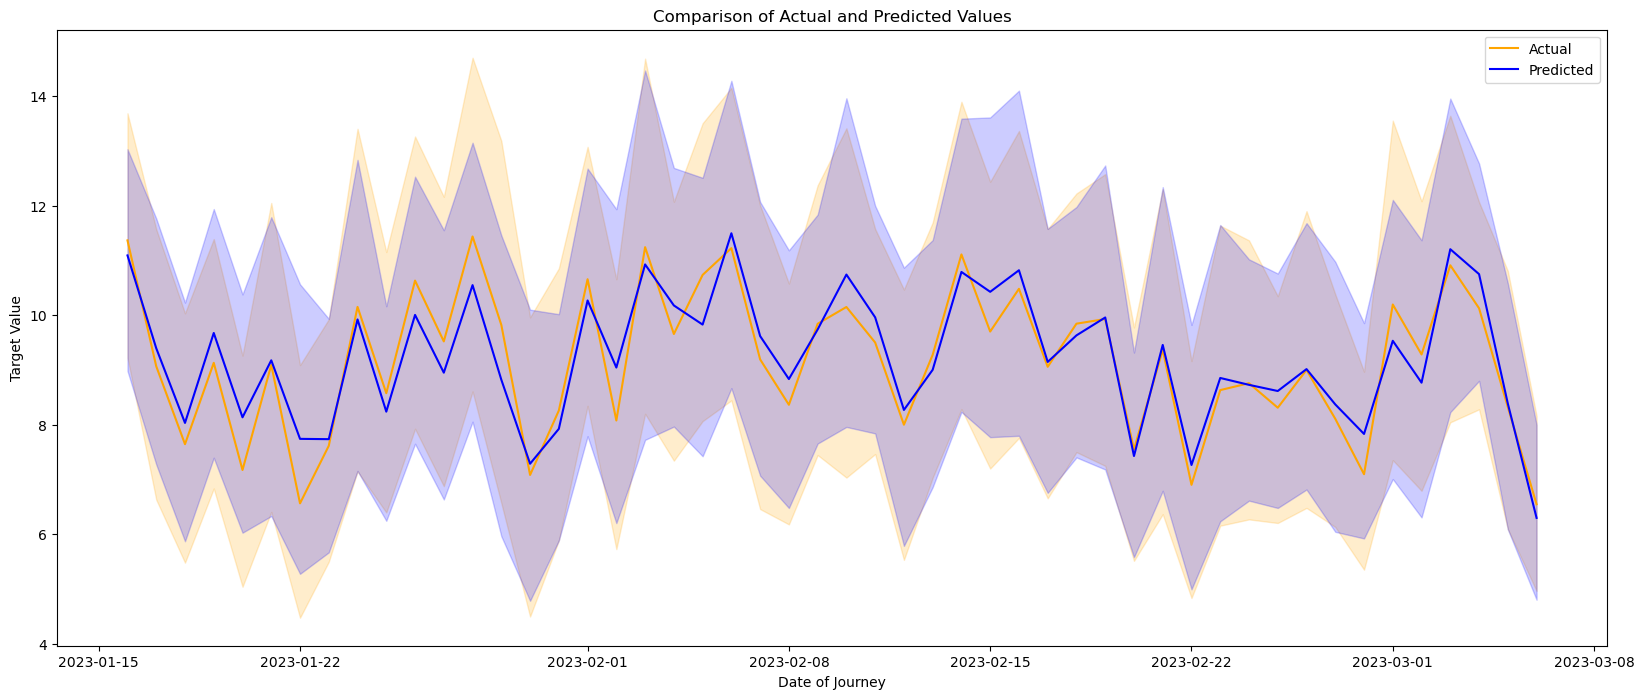

In [27]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.lineplot(data=airline_df, x='Date_of_journey', y='Actual_booked', label='Actual', color='orange')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Pred_booked', label='Predicted', color='blue')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [29]:
import catboost as cb

model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.3,
    depth=7,
    loss_function='RMSE',
    random_seed=42
)


In [30]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


0:	learn: 5.4428069	total: 81.7ms	remaining: 1m 21s
1:	learn: 4.5654084	total: 102ms	remaining: 51s
2:	learn: 4.0915554	total: 114ms	remaining: 38s
3:	learn: 3.7393082	total: 126ms	remaining: 31.5s
4:	learn: 3.5311356	total: 138ms	remaining: 27.5s
5:	learn: 3.3461043	total: 145ms	remaining: 23.9s
6:	learn: 3.2446549	total: 153ms	remaining: 21.7s
7:	learn: 3.1383358	total: 159ms	remaining: 19.7s
8:	learn: 3.0513362	total: 165ms	remaining: 18.2s
9:	learn: 3.0034764	total: 173ms	remaining: 17.2s
10:	learn: 2.9610840	total: 178ms	remaining: 16s
11:	learn: 2.9041719	total: 184ms	remaining: 15.2s
12:	learn: 2.8724947	total: 192ms	remaining: 14.5s
13:	learn: 2.8168568	total: 196ms	remaining: 13.8s
14:	learn: 2.7949677	total: 203ms	remaining: 13.3s
15:	learn: 2.7466811	total: 209ms	remaining: 12.9s
16:	learn: 2.6880409	total: 215ms	remaining: 12.4s
17:	learn: 2.6549315	total: 223ms	remaining: 12.1s
18:	learn: 2.6288871	total: 228ms	remaining: 11.8s
19:	learn: 2.6006498	total: 235ms	remaining: 

In [31]:
y_preds.shape
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['CatBoostRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9527143822108076
22.777624682679313


In [32]:
out=pd.DataFrame({'Actual_booked':y_test,'Pred_booked':y_preds})
result=passengers_df.merge(out,left_index=True,right_index=True)

In [33]:
airline_df = result[result['Flight_code']==1403]
airline_df = airline_df[airline_df['Class']==1]

<Figure size 2000x800 with 0 Axes>

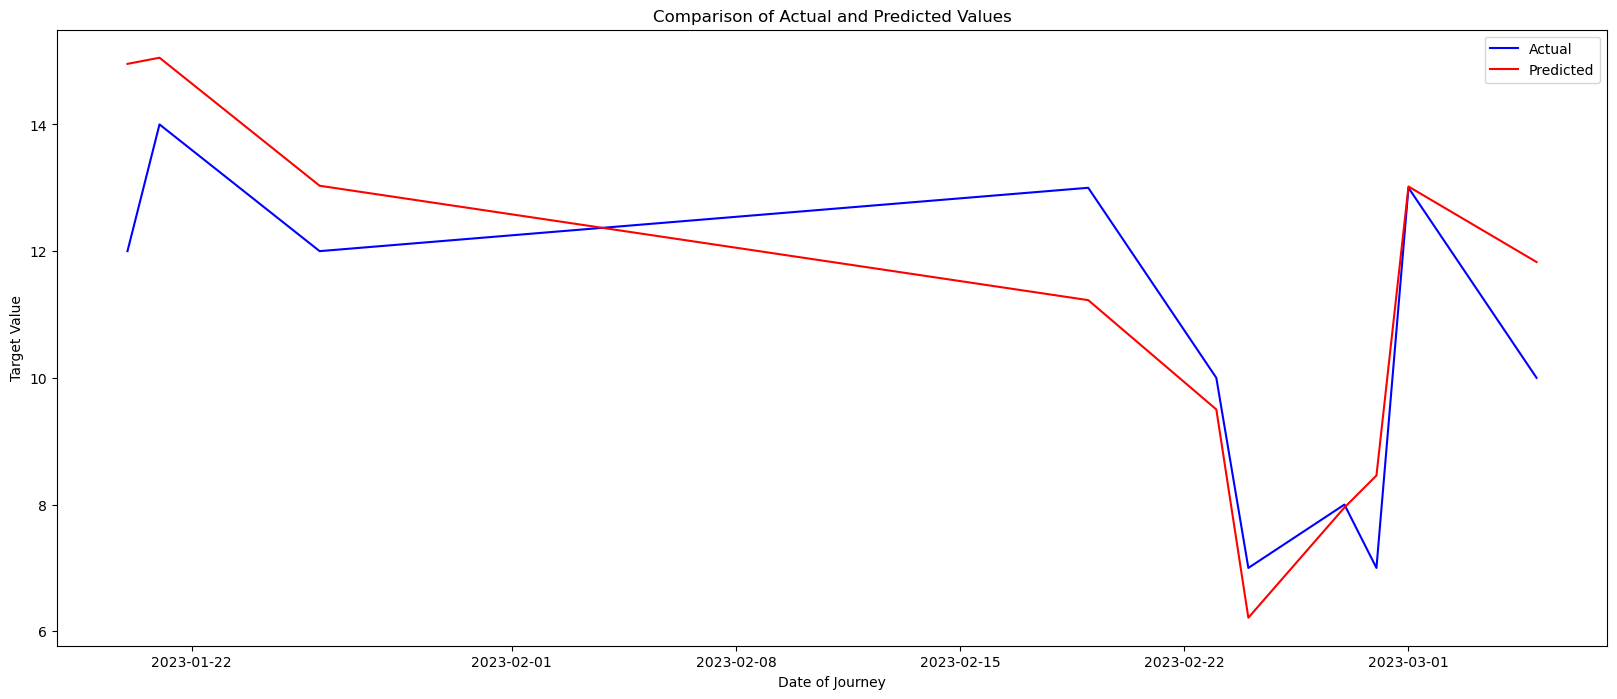

In [34]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [36]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [ ]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['BaggingRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

In [ ]:
out=pd.DataFrame({'Actual_booked':y_test,'Pred_booked':y_preds})
result=passengers_df.merge(out,left_index=True,right_index=True)

In [ ]:
airline_df = result[result['Airline']==8]
airline_df = airline_df[airline_df['Class']==1]

In [ ]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Tickets Booked')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ['Model','R2 Score', 'MAPE', 'RMSE']
models_df

In [25]:
r2_score?


Signature:
r2_score(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    force_finite=True,
)
Docstring:
:math:`R^2` (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). In the general case when the true y is
non-constant, a constant model that always predicts the average y
disregarding the input features would get a :math:`R^2` score of 0.0.

In the particular case when ``y_true`` is constant, the :math:`R^2` score
is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
(imperfect predictions). To prevent such non-finite numbers to pollute
higher-level experiments such as a grid search cross-validation, by default
these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
predictions) respectively. You can set ``force_finite`` to ``False`` to
prevent this fix from happening.

Note: when the prediction residuals hav

In [ ]:
_